In [202]:
import torch
import torchvision
from torchvision import datasets
import torch.nn as nn
from torchvision import transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [203]:
num_classes = 2
num_epochs = 10

In [204]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((28,28)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


#test_dataset = torchvision.datasets.MNIST(root = './data',
                                         # train = False,
                                        #  transform = transforms.Compose([
                                         #         transforms.Resize((32,32)),
                                               #   transforms.ToTensor(),
                                                #  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                       #   download=True)

In [205]:
train_dataset1 = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((28,28)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)

In [206]:
idx = train_dataset.targets==1
train_dataset.targets = train_dataset.targets[idx]
train_dataset.data = train_dataset.data[idx]

In [207]:
idx = train_dataset1.targets==0
train_dataset1.targets = train_dataset1.targets[idx]
train_dataset1.data = train_dataset1.data[idx]

In [208]:
train_dataset2 = train_dataset + train_dataset1

In [209]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 9)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.1)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
  )
  (fc_final): Linear(in_features=256, out_features=2, bias=True)
)


In [210]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [211]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [212]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [213]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.1, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.1362
Epoch [2/10], Loss: 0.0174
Epoch [3/10], Loss: 0.0108
Epoch [4/10], Loss: 0.0084
Epoch [5/10], Loss: 0.0067
Epoch [6/10], Loss: 0.0057
Epoch [7/10], Loss: 0.0049
Epoch [8/10], Loss: 0.0043
Epoch [9/10], Loss: 0.0038
Epoch [10/10], Loss: 0.0034


In [214]:
LN2 = Net()
def init_weights1(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.1)))
LN2.apply(init_weights1)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw16 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6466
Epoch [2/10], Loss: 0.6466
Epoch [3/10], Loss: 0.6466
Epoch [4/10], Loss: 0.6466
Epoch [5/10], Loss: 0.6466
Epoch [6/10], Loss: 0.6466
Epoch [7/10], Loss: 0.6466
Epoch [8/10], Loss: 0.6466
Epoch [9/10], Loss: 0.6466
Epoch [10/10], Loss: 0.6466


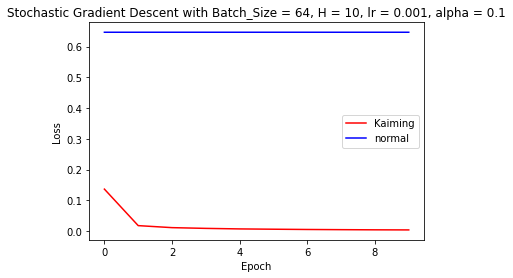

In [215]:
plt.plot(epochs, lw, color='r', label='Kaiming')
plt.plot(epochs, lw16, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 10, lr = 0.001, alpha = 0.1")
plt.legend()
plt.show()

In [216]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 9)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.5)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
  )
  (fc_final): Linear(in_features=256, out_features=2, bias=True)
)


In [217]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [218]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [219]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [220]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.5, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw1 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.1310
Epoch [2/10], Loss: 0.0160
Epoch [3/10], Loss: 0.0103
Epoch [4/10], Loss: 0.0083
Epoch [5/10], Loss: 0.0071
Epoch [6/10], Loss: 0.0063
Epoch [7/10], Loss: 0.0058
Epoch [8/10], Loss: 0.0053
Epoch [9/10], Loss: 0.0049
Epoch [10/10], Loss: 0.0046


In [221]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.5)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw17 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6888
Epoch [2/10], Loss: 0.6888
Epoch [3/10], Loss: 0.6888
Epoch [4/10], Loss: 0.6888
Epoch [5/10], Loss: 0.6888
Epoch [6/10], Loss: 0.6888
Epoch [7/10], Loss: 0.6888
Epoch [8/10], Loss: 0.6889
Epoch [9/10], Loss: 0.6888
Epoch [10/10], Loss: 0.6888


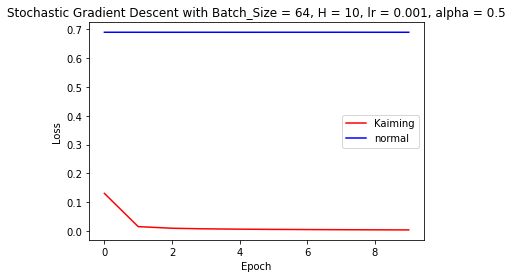

In [222]:
plt.plot(epochs, lw1, color='r', label='Kaiming')
plt.plot(epochs, lw17, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 10, lr = 0.001, alpha = 0.5")
plt.legend()
plt.show()

In [223]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 9)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(1.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
  )
  (fc_final): Linear(in_features=256, out_features=2, bias=True)
)


In [224]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [225]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [226]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [227]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 1.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw2 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0772
Epoch [2/10], Loss: 0.0137
Epoch [3/10], Loss: 0.0101
Epoch [4/10], Loss: 0.0084
Epoch [5/10], Loss: 0.0074
Epoch [6/10], Loss: 0.0067
Epoch [7/10], Loss: 0.0061
Epoch [8/10], Loss: 0.0057
Epoch [9/10], Loss: 0.0052
Epoch [10/10], Loss: 0.0050


In [228]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*2.0)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw18 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6140
Epoch [2/10], Loss: 0.6140
Epoch [3/10], Loss: 0.6139
Epoch [4/10], Loss: 0.6140
Epoch [5/10], Loss: 0.6140
Epoch [6/10], Loss: 0.6140
Epoch [7/10], Loss: 0.6140
Epoch [8/10], Loss: 0.6140
Epoch [9/10], Loss: 0.6139
Epoch [10/10], Loss: 0.6140


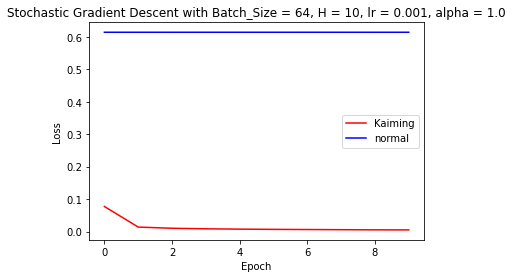

In [229]:
plt.plot(epochs, lw2, color='r', label='Kaiming')
plt.plot(epochs, lw18, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 10, lr = 0.001, alpha = 1.0")
plt.legend()
plt.show()

In [230]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 9)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(2.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
  )
  (fc_final): Linear(in_features=256, out_features=2, bias=True)
)


In [231]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [232]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [233]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [234]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 2.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw3 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0527
Epoch [2/10], Loss: 0.0118
Epoch [3/10], Loss: 0.0091
Epoch [4/10], Loss: 0.0075
Epoch [5/10], Loss: 0.0064
Epoch [6/10], Loss: 0.0056
Epoch [7/10], Loss: 0.0050
Epoch [8/10], Loss: 0.0045
Epoch [9/10], Loss: 0.0041
Epoch [10/10], Loss: 0.0037


In [235]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*3.0)), a = -np.sqrt(2/(256*3.0)), b =np.sqrt(2/(256*3.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw19 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6894
Epoch [2/10], Loss: 0.6894
Epoch [3/10], Loss: 0.6894
Epoch [4/10], Loss: 0.6894
Epoch [5/10], Loss: 0.6894
Epoch [6/10], Loss: 0.6894
Epoch [7/10], Loss: 0.6894
Epoch [8/10], Loss: 0.6894
Epoch [9/10], Loss: 0.6894
Epoch [10/10], Loss: 0.6894


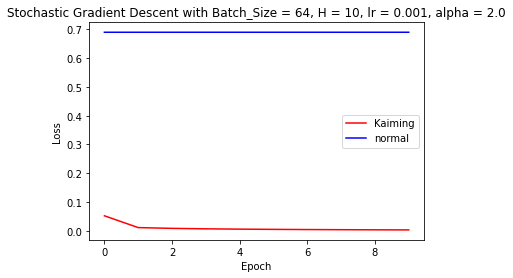

In [236]:
plt.plot(epochs, lw3, color='r', label='Kaiming')
plt.plot(epochs, lw19, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 10, lr = 0.001, alpha = 2.0")
plt.legend()
plt.show()

In [237]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 19)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.1)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [238]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [239]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [240]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [241]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.1, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw4 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.2322
Epoch [2/10], Loss: 0.0146
Epoch [3/10], Loss: 0.0077
Epoch [4/10], Loss: 0.0053
Epoch [5/10], Loss: 0.0042
Epoch [6/10], Loss: 0.0034
Epoch [7/10], Loss: 0.0025
Epoch [8/10], Loss: 0.0021
Epoch [9/10], Loss: 0.0020
Epoch [10/10], Loss: 0.0017


In [242]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.1)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw20 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6811
Epoch [2/10], Loss: 0.6811
Epoch [3/10], Loss: 0.6811
Epoch [4/10], Loss: 0.6811
Epoch [5/10], Loss: 0.6811
Epoch [6/10], Loss: 0.6811
Epoch [7/10], Loss: 0.6811
Epoch [8/10], Loss: 0.6811
Epoch [9/10], Loss: 0.6810
Epoch [10/10], Loss: 0.6811


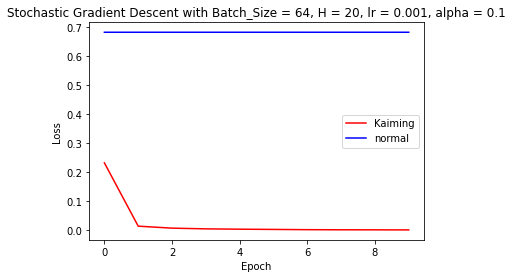

In [243]:
plt.plot(epochs, lw4, color='r', label='Kaiming')
plt.plot(epochs, lw20, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 20, lr = 0.001, alpha = 0.1")
plt.legend()
plt.show()

In [244]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 19)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.5)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [245]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [246]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [247]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [248]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.5, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw5 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.1012
Epoch [2/10], Loss: 0.0093
Epoch [3/10], Loss: 0.0065
Epoch [4/10], Loss: 0.0052
Epoch [5/10], Loss: 0.0045
Epoch [6/10], Loss: 0.0039
Epoch [7/10], Loss: 0.0035
Epoch [8/10], Loss: 0.0031
Epoch [9/10], Loss: 0.0028
Epoch [10/10], Loss: 0.0026


In [249]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(1.5*256)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw21 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6604
Epoch [2/10], Loss: 0.6604
Epoch [3/10], Loss: 0.6604
Epoch [4/10], Loss: 0.6604
Epoch [5/10], Loss: 0.6604
Epoch [6/10], Loss: 0.6604
Epoch [7/10], Loss: 0.6604
Epoch [8/10], Loss: 0.6604
Epoch [9/10], Loss: 0.6604
Epoch [10/10], Loss: 0.6604


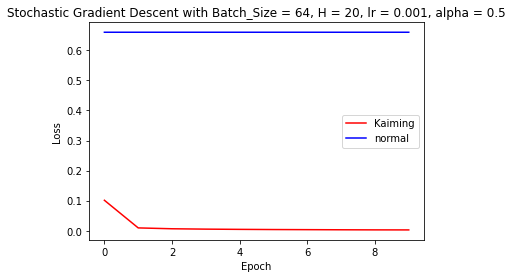

In [250]:
plt.plot(epochs, lw5, color='r', label='Kaiming')
plt.plot(epochs, lw21, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 20, lr = 0.001, alpha = 0.5")
plt.legend()
plt.show()

In [251]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 19)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(1.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [252]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [253]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [254]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [255]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 1.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw6 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0452
Epoch [2/10], Loss: 0.0081
Epoch [3/10], Loss: 0.0062
Epoch [4/10], Loss: 0.0050
Epoch [5/10], Loss: 0.0043
Epoch [6/10], Loss: 0.0039
Epoch [7/10], Loss: 0.0035
Epoch [8/10], Loss: 0.0033
Epoch [9/10], Loss: 0.0030
Epoch [10/10], Loss: 0.0029


In [256]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*2.0)), a = -np.sqrt(2/(256*2.0)), b =np.sqrt(2/(256*2.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw22 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6923
Epoch [2/10], Loss: 0.6923
Epoch [3/10], Loss: 0.6923
Epoch [4/10], Loss: 0.6923
Epoch [5/10], Loss: 0.6923
Epoch [6/10], Loss: 0.6923
Epoch [7/10], Loss: 0.6923
Epoch [8/10], Loss: 0.6923
Epoch [9/10], Loss: 0.6923
Epoch [10/10], Loss: 0.6923


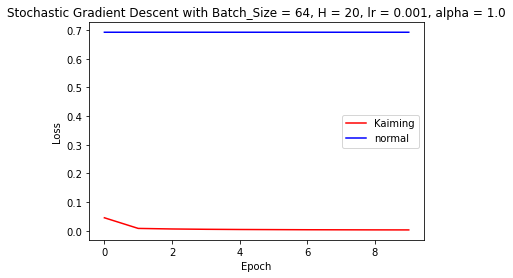

In [257]:
plt.plot(epochs, lw6, color='r', label='Kaiming')
plt.plot(epochs, lw22, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 20, lr = 0.001, alpha = 1.0")
plt.legend()
plt.show()

In [258]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 19)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(2.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [259]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [260]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [261]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [262]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 2.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw7 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0409
Epoch [2/10], Loss: 0.0058
Epoch [3/10], Loss: 0.0041
Epoch [4/10], Loss: 0.0029
Epoch [5/10], Loss: 0.0023
Epoch [6/10], Loss: 0.0018
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0010
Epoch [10/10], Loss: 0.0007


In [263]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*3.0)), a = -np.sqrt(2/(256*3.0)), b =np.sqrt(2/(256*3.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw23 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6973
Epoch [2/10], Loss: 0.6973
Epoch [3/10], Loss: 0.6973
Epoch [4/10], Loss: 0.6973
Epoch [5/10], Loss: 0.6973
Epoch [6/10], Loss: 0.6973
Epoch [7/10], Loss: 0.6973
Epoch [8/10], Loss: 0.6973
Epoch [9/10], Loss: 0.6973
Epoch [10/10], Loss: 0.6973


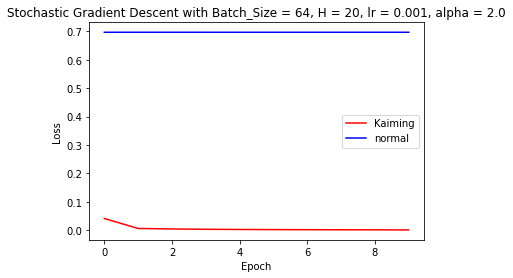

In [264]:
plt.plot(epochs, lw7, color='r', label='Kaiming')
plt.plot(epochs, lw23, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 20, lr = 0.001, alpha = 2.0")
plt.legend()
plt.show()

In [265]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 29)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.1)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [266]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [267]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [268]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [269]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.1, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw8 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.1147
Epoch [2/10], Loss: 0.0091
Epoch [3/10], Loss: 0.0053
Epoch [4/10], Loss: 0.0040
Epoch [5/10], Loss: 0.0024
Epoch [6/10], Loss: 0.0027
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0015
Epoch [9/10], Loss: 0.0008
Epoch [10/10], Loss: 0.0010


In [270]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.1)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw24 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6880
Epoch [2/10], Loss: 0.6880
Epoch [3/10], Loss: 0.6880
Epoch [4/10], Loss: 0.6880
Epoch [5/10], Loss: 0.6880
Epoch [6/10], Loss: 0.6880
Epoch [7/10], Loss: 0.6880
Epoch [8/10], Loss: 0.6880
Epoch [9/10], Loss: 0.6880
Epoch [10/10], Loss: 0.6880


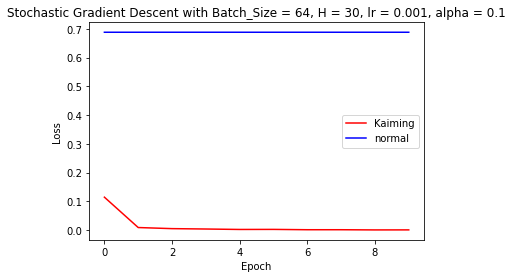

In [271]:
plt.plot(epochs, lw8, color='r', label='Kaiming')
plt.plot(epochs, lw24, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 30, lr = 0.001, alpha = 0.1")
plt.legend()
plt.show()

In [272]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 29)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.5)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [273]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [274]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [275]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [276]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.5, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw9 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0531
Epoch [2/10], Loss: 0.0071
Epoch [3/10], Loss: 0.0043
Epoch [4/10], Loss: 0.0035
Epoch [5/10], Loss: 0.0027
Epoch [6/10], Loss: 0.0024
Epoch [7/10], Loss: 0.0019
Epoch [8/10], Loss: 0.0019
Epoch [9/10], Loss: 0.0014
Epoch [10/10], Loss: 0.0013


In [277]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.5)), a = -np.sqrt(2/(256*1.5)), b =np.sqrt(2/(256*1.5)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw25 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6961
Epoch [2/10], Loss: 0.6961
Epoch [3/10], Loss: 0.6961
Epoch [4/10], Loss: 0.6961
Epoch [5/10], Loss: 0.6961
Epoch [6/10], Loss: 0.6961
Epoch [7/10], Loss: 0.6961
Epoch [8/10], Loss: 0.6961
Epoch [9/10], Loss: 0.6961
Epoch [10/10], Loss: 0.6961


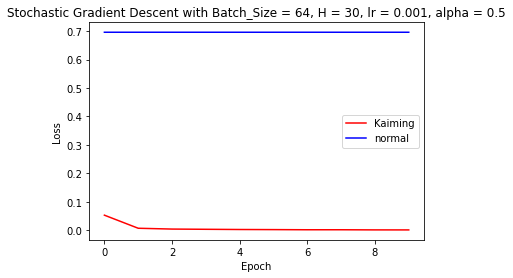

In [278]:
plt.plot(epochs, lw9, color='r', label='Kaiming')
plt.plot(epochs, lw25, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 30, lr = 0.001, alpha = 0.5")
plt.legend()
plt.show()

In [279]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 29)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(1.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [280]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [281]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [282]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [283]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 1.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw10 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0604
Epoch [2/10], Loss: 0.0087
Epoch [3/10], Loss: 0.0062
Epoch [4/10], Loss: 0.0051
Epoch [5/10], Loss: 0.0042
Epoch [6/10], Loss: 0.0038
Epoch [7/10], Loss: 0.0031
Epoch [8/10], Loss: 0.0028
Epoch [9/10], Loss: 0.0025
Epoch [10/10], Loss: 0.0024


In [284]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*2.0)), a = -np.sqrt(2/(256*2.0)), b =np.sqrt(2/(256*2.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw26 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6915
Epoch [2/10], Loss: 0.6915
Epoch [3/10], Loss: 0.6915
Epoch [4/10], Loss: 0.6915
Epoch [5/10], Loss: 0.6915
Epoch [6/10], Loss: 0.6915
Epoch [7/10], Loss: 0.6915
Epoch [8/10], Loss: 0.6915
Epoch [9/10], Loss: 0.6915
Epoch [10/10], Loss: 0.6915


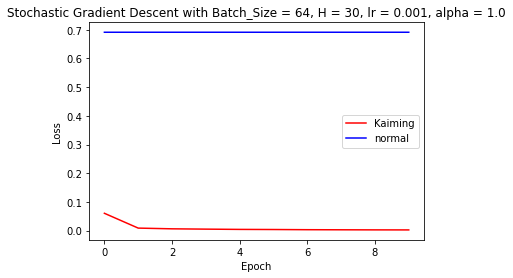

In [285]:
plt.plot(epochs, lw10, color='r', label='Kaiming')
plt.plot(epochs, lw26, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 30, lr = 0.001, alpha = 1.0")
plt.legend()
plt.show()

In [286]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 29)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(2.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [287]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [288]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [289]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [290]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 2.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw11 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0251
Epoch [2/10], Loss: 0.0045
Epoch [3/10], Loss: 0.0027
Epoch [4/10], Loss: 0.0015
Epoch [5/10], Loss: 0.0010
Epoch [6/10], Loss: 0.0007
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0003
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0001


In [291]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*3.0)), a = -np.sqrt(2/(256*3.0)), b =np.sqrt(2/(256*3.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw27 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6955
Epoch [2/10], Loss: 0.6955
Epoch [3/10], Loss: 0.6955
Epoch [4/10], Loss: 0.6955
Epoch [5/10], Loss: 0.6955
Epoch [6/10], Loss: 0.6955
Epoch [7/10], Loss: 0.6955
Epoch [8/10], Loss: 0.6955
Epoch [9/10], Loss: 0.6955
Epoch [10/10], Loss: 0.6955


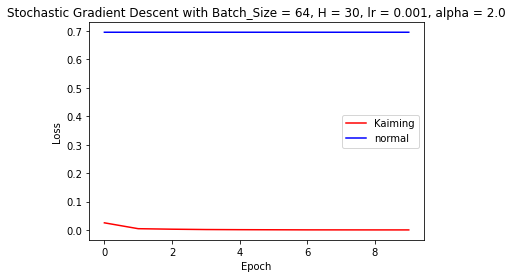

In [292]:
plt.plot(epochs, lw11, color='r', label='Kaiming')
plt.plot(epochs, lw27, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 30, lr = 0.001, alpha = 2.0")
plt.legend()
plt.show()

In [293]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 39)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.1)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [294]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [295]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [296]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [297]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.1, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw12 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.1972
Epoch [2/10], Loss: 0.0201
Epoch [3/10], Loss: 0.0949
Epoch [4/10], Loss: 0.0715
Epoch [5/10], Loss: 0.0055
Epoch [6/10], Loss: 0.0035
Epoch [7/10], Loss: 0.0024
Epoch [8/10], Loss: 0.0012
Epoch [9/10], Loss: 0.0011
Epoch [10/10], Loss: 0.0014


In [298]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.1)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw28 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6807
Epoch [2/10], Loss: 0.6807
Epoch [3/10], Loss: 0.6807
Epoch [4/10], Loss: 0.6808
Epoch [5/10], Loss: 0.6808
Epoch [6/10], Loss: 0.6807
Epoch [7/10], Loss: 0.6807
Epoch [8/10], Loss: 0.6807
Epoch [9/10], Loss: 0.6807
Epoch [10/10], Loss: 0.6807


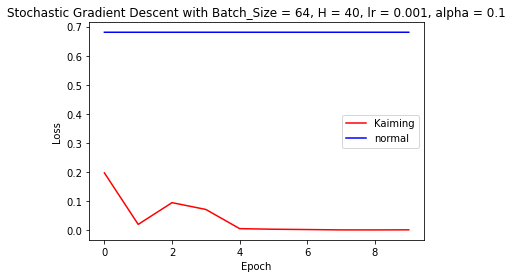

In [299]:
plt.plot(epochs, lw12, color='r', label='Kaiming')
plt.plot(epochs, lw28, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 40, lr = 0.001, alpha = 0.1")
plt.legend()
plt.show()

In [300]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 39)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(0.5)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [301]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [302]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [303]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [304]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 0.5, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw13 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0297
Epoch [2/10], Loss: 0.0055
Epoch [3/10], Loss: 0.0036
Epoch [4/10], Loss: 0.0029
Epoch [5/10], Loss: 0.0021
Epoch [6/10], Loss: 0.0018
Epoch [7/10], Loss: 0.0015
Epoch [8/10], Loss: 0.0013
Epoch [9/10], Loss: 0.0012
Epoch [10/10], Loss: 0.0010


In [305]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*1.5)), a = -np.sqrt(2/(256*1.5)), b =np.sqrt(2/(256*1.5)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw29 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6939
Epoch [2/10], Loss: 0.6939
Epoch [3/10], Loss: 0.6939
Epoch [4/10], Loss: 0.6939
Epoch [5/10], Loss: 0.6939
Epoch [6/10], Loss: 0.6939
Epoch [7/10], Loss: 0.6939
Epoch [8/10], Loss: 0.6939
Epoch [9/10], Loss: 0.6939
Epoch [10/10], Loss: 0.6939


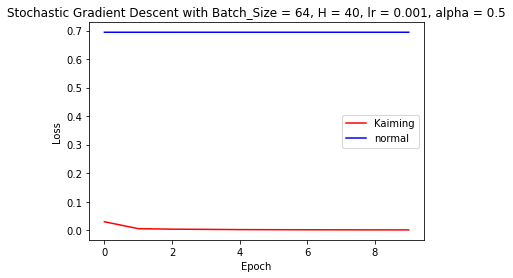

In [306]:
plt.plot(epochs, lw13, color='r', label='Kaiming')
plt.plot(epochs, lw29, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 40, lr = 0.001, alpha = 0.5")
plt.legend()
plt.show()

In [307]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 39)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(1.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [308]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [309]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [310]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [311]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 1.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw14 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0486
Epoch [2/10], Loss: 0.0099
Epoch [3/10], Loss: 0.0073
Epoch [4/10], Loss: 0.0061
Epoch [5/10], Loss: 0.0051
Epoch [6/10], Loss: 0.0046
Epoch [7/10], Loss: 0.0039
Epoch [8/10], Loss: 0.0036
Epoch [9/10], Loss: 0.0032
Epoch [10/10], Loss: 0.0028


In [312]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*2.0)), a = -np.sqrt(2/(256*2.0)), b =np.sqrt(2/(256*2.0)) )
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw30 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6931
Epoch [2/10], Loss: 0.6931
Epoch [3/10], Loss: 0.6931
Epoch [4/10], Loss: 0.6931
Epoch [5/10], Loss: 0.6931
Epoch [6/10], Loss: 0.6931
Epoch [7/10], Loss: 0.6931
Epoch [8/10], Loss: 0.6931
Epoch [9/10], Loss: 0.6931
Epoch [10/10], Loss: 0.6931


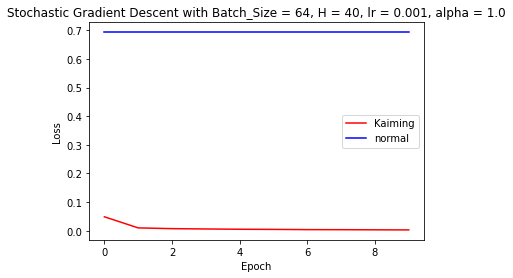

In [313]:
plt.plot(epochs, lw14, color='r', label='Kaiming')
plt.plot(epochs, lw30, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 40, lr = 0.001, alpha = 1.0")
plt.legend()
plt.show()

In [314]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 49, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.ModuleList([nn.Linear(784, 256)])
        self.fc1.extend([nn.Linear(256, 256) for i in range(1, 39)])
        self.fc_final = nn.Linear(256, 2)
        #self.list = [nn.Linear(3, 4), nn.ReLU()]

    def forward(self, x):
        # Max pooling over a (2, 2) window
        m = nn.LeakyReLU(2.0)
        x = m(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = m(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        for fc1 in self.fc1:
            x = m(fc1(x))
        #x = self.fc1(x)
        #x = m(self.fc1(x))
        x = self.fc_final(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 49, kernel_size=(5, 5), stride=(1, 1))
  (fc1): ModuleList(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): Linear(in_features=256, out_features=256, bias=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): Linear(in_features=256, out_features

In [315]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(LN1.parameters(), lr=0.01)

In [316]:
def train(bs, lr1, num_epochs, train_dataset, model, cost, losses):
    for epoch in range(num_epochs):
        epoch_loss = 0
        num = 0
        h = []
        train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = bs,
                                           shuffle = True)
        for i, (images, labels) in enumerate(train_loader):
                outputs = model(images)
                loss = cost(outputs, labels)
                optimizer = optim.SGD(LN1.parameters(), lr1)
            # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                epoch_loss += loss
                num += 1
        
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, epoch_loss / num))
        losses.append(epoch_loss / num)
    #return losses

In [317]:
epochs = []
for i in range(num_epochs):
    epochs.append(i)

In [318]:
LN1 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.kaiming_normal_(m.weight, a = 2.0, nonlinearity='leaky_relu')
LN1.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN1, criterion, losses)
lw15 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.0288
Epoch [2/10], Loss: 0.0055
Epoch [3/10], Loss: 0.0039
Epoch [4/10], Loss: 0.0018
Epoch [5/10], Loss: 0.0014
Epoch [6/10], Loss: 0.0008
Epoch [7/10], Loss: 0.0004
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0001
Epoch [10/10], Loss: 0.0001


In [319]:
LN2 = Net()
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.trunc_normal_(m.weight, mean=0.0, std=np.sqrt(2/(256*3.0)), a = -np.sqrt(2/(256*3.0)), b = np.sqrt(2/(256*3.0)))
LN2.apply(init_weights)
losses = []
train(64, 0.001, num_epochs, train_dataset2, LN2, criterion, losses)
lw31 = torch.FloatTensor(losses)

Epoch [1/10], Loss: 0.6957
Epoch [2/10], Loss: 0.6957
Epoch [3/10], Loss: 0.6957
Epoch [4/10], Loss: 0.6957
Epoch [5/10], Loss: 0.6957
Epoch [6/10], Loss: 0.6957
Epoch [7/10], Loss: 0.6957
Epoch [8/10], Loss: 0.6957
Epoch [9/10], Loss: 0.6957
Epoch [10/10], Loss: 0.6957


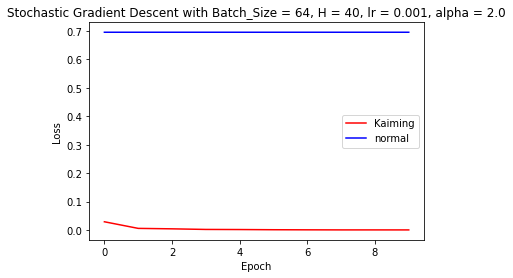

In [320]:
plt.plot(epochs, lw15, color='r', label='Kaiming')
plt.plot(epochs, lw31, color='b', label='normal')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent with Batch_Size = 64, H = 40, lr = 0.001, alpha = 2.0")
plt.legend()
plt.show()